In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("D:\\Source_code\\Lab\\data\\IMDB Dataset.csv")
print(data.head())

X=data['review']
Y=data['sentiment'].map({'positive':1,'negative':0})

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)
tokenize=Tokenizer(num_words=10000,oov_token='<oov>')
tokenize.fit_on_texts(xtrain)

xtrain=pad_sequences(tokenize.texts_to_sequences(xtrain),maxlen=200)
xtest=pad_sequences(tokenize.texts_to_sequences(xtest),maxlen=200)

In [11]:
model=Sequential([
    Embedding(10000,32,input_length=200),
    SimpleRNN(32,activation='relu'),
    Dense(1,activation='relu')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(xtrain,ytrain,epochs=5,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6602 - loss: 0.6655 - val_accuracy: 0.7373 - val_loss: 0.5381
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7393 - loss: 0.5431 - val_accuracy: 0.6278 - val_loss: 0.6288
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7981 - loss: 0.4649 - val_accuracy: 0.7887 - val_loss: 0.5071
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8606 - loss: 0.3695 - val_accuracy: 0.8131 - val_loss: 0.5469
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8939 - loss: 0.3017 - val_accuracy: 0.8165 - val_loss: 0.5461


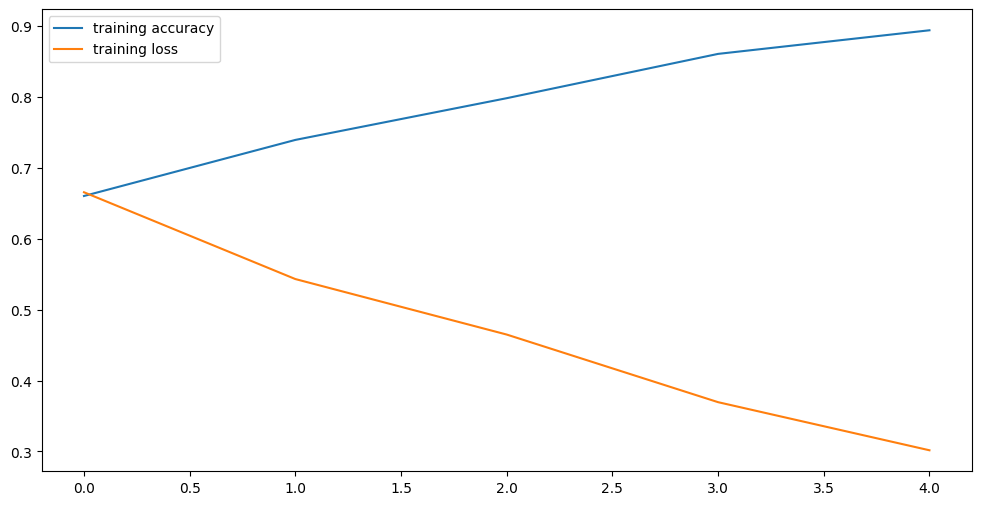

In [13]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label='training loss')
plt.legend()
plt.show()